**Question 1:** Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250,
300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate
visualization to show how many samples will we need to have a good estimate of the population mean
(this is a corrected version of the last challenge of the previous exercise).

In [15]:
# Libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for numerical operations and arrays
import zipfile 
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for showing plots
from statsmodels.graphics.gofplots import qqplot  # for creating a quantile-quantile (QQ) plot
import random # for generating random numbers and performing random selections
from scipy.stats import norm, probplot

In [2]:
# Load the dataset
df =pd.read_csv('/content/EFIplus_medit (3).zip',compression='zip', sep=";")

In [3]:
# Show data
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


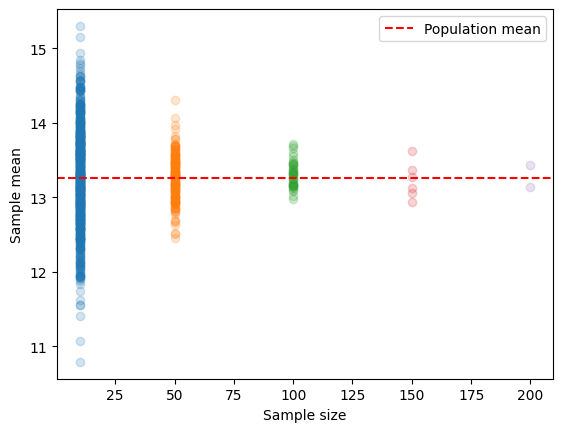

In [6]:
# Set the number of samples to generate
n_samples = 1000

# Set the sample sizes to use
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]

# Generate the samples and compute the means
sample_means = []
for n in sample_sizes:
    means = []
    for i in range(n_samples):
        sample = np.random.choice(df['temp_ann'], size=n, replace=True)
        means.append(sample.mean())
    sample_means.append(means)

# Plot the means against the sample sizes
fig, ax = plt.subplots()
for i in range(len(sample_sizes)):
    ax.scatter(np.repeat(sample_sizes[i], n_samples), sample_means[i], alpha=0.2)
ax.set_xlabel('Sample size')
ax.set_ylabel('Sample mean')
ax.axhline(df['temp_ann'].mean(), color='r', linestyle='--', label='Population mean')
ax.legend()
plt.show()

**Question 2 :** Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the
presence of Salmo trutta fario (Brown Trout).

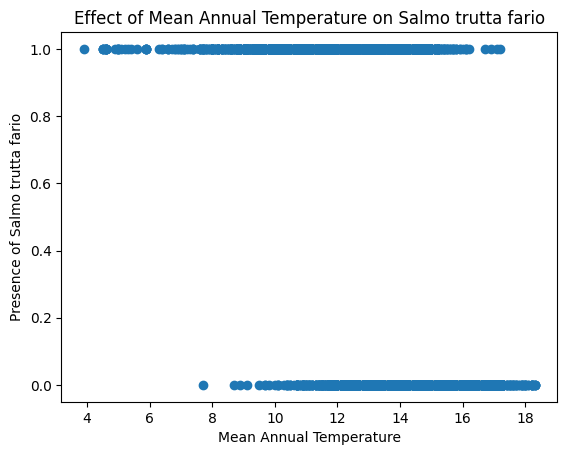

In [10]:
# Create a scatter plot with Temp_ann on the x-axis and Salmo trutta fario on the y-axis
plt.scatter(df['temp_ann'], df['Salmo trutta fario'])

# Add axis labels and a title
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Presence of Salmo trutta fario')
plt.title('Effect of Mean Annual Temperature on Salmo trutta fario')
plt.show()

**Question 3 :** Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a
normal distribution

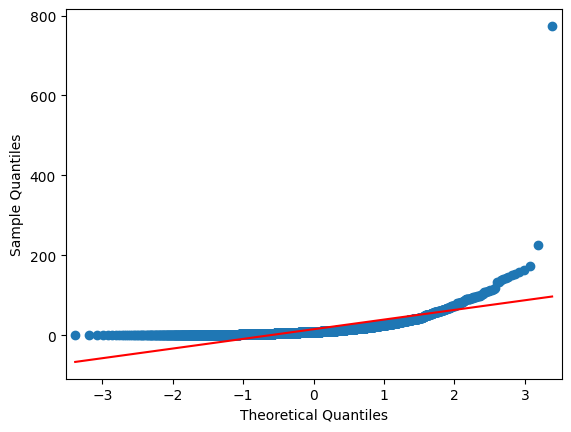

In [20]:
# drops rows when at least one element is a missing value and creates a new dataframe df2
df2 = df.dropna()
# qqplot
data = df2['Actual_river_slope']
qqplot(data, line='s')
plt.show()

In [21]:
# import 
from scipy.stats import shapiro # performs the Shapiro-Wilk test for normality

# conduct Shapiro-Wilk test for normality
stat, p = shapiro(pd.Series(data))

# prints the test statistics and p-value
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret the results by comparing the p-value with the significance level alpha = 0.05
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
    print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')


Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


**Question 5 :** Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot
the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.

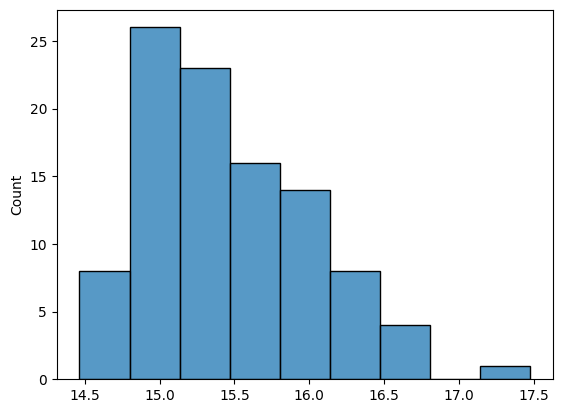

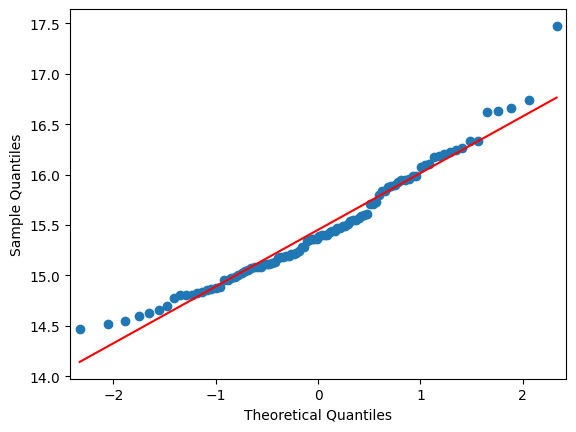

Statistics=0.962, p=0.006
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [22]:
mean = [np.mean(data.take(np.random.randint(0, len(data), 2000))) for i in range(100)]

sns.histplot(mean)
qqplot(pd.Series(mean), line='s')
plt.show()

# normality test
stat, p = shapiro(mean)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
    print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')
